In [1]:
# Imports
import math
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Task 1: Creating the single layer perceptron (3 points)

In this lab we will focus on the perceptron, and how it can be used to model logic gates. Further, this same idea can be extended further due to perceptrons being a universal function approximator

**Implement the `sigmoid` function** *(1 point)*

$𝑆(x) = \frac{1}{1 + e^{-x}}$



In [2]:
def sigmoid(x):
  '''
    Applies the sigmoid function to the given input

    Parameters
    ----------
    x: torch.Tensor
        Input array/tensor

    Returns
    -------
    out: torch.Tensor
        Tensor after applying sigmoid function to it
  '''
  return 1/(1+torch.exp(-x))

**Implement the `perceptron` function** *(1 point)*

$y' = x \bullet W^t + b$

In [3]:
def perceptron(inputs, weights, bias):
  '''
    Defines the single layer perceptron model
  '''
  return sigmoid(torch.matmul(inputs, weights.T) + bias)

**Implement the `binary_cross_entropy` function** *(1 point)*

$\mathrm{Loss} = - \frac{1}{\mathrm{N}} \sum_{i=1}^{\mathrm{N}} y_i \cdot \mathrm{log}\; {\hat{y}}_i + (1-y_i) \cdot \mathrm{log}\; (1-{\hat{y}}_i)$

In [4]:
def binary_cross_entropy(preds, targets):
  '''
    Applies binary cross entropy given predictions and ground truth
  '''
  return -torch.mean(targets*torch.log(preds) + (1-targets)*torch.log(1-preds))

## AND Gate

In [5]:
and_data = np.array([[0,0,0],
                     [0,1,0],
                     [1,0,0],
                     [1,1,1]])

# Creating a PyTorch tensor
and_data = torch.Tensor(and_data)

In [6]:
# Same slicing as np arrays
X = and_data[:,:-1]
y = and_data[:,-1:]

In [7]:
W = torch.randn((1,2), requires_grad=True)
b = torch.randn((1,1), requires_grad=True)

**Create the training loop** *(1 point)*

In [8]:
n_epochs = 100
lr = 5e-1
losses = []
for _ in range(n_epochs):
  # Define the Training Loop here
  # 
  # Get predictions
  # Calculate Loss
  # Do a backward step (to calculate gradients)
  # Update Weights
  # Append Loss
  pred = perceptron(X, W, b)
  loss = binary_cross_entropy(pred, y)
  losses.append(loss.item())
  loss.backward()         # Propagate the loss backwards (Stored in W.grad and b.grad)

  
  with torch.no_grad():          # Gradients must be detached from computational graph         
    W = W.subtract(lr*W.grad)
    b = b.subtract(lr*b.grad)
  
  '''
  with torch.no_grad():
    W -= lr*W.grad
    b -= lr*b.grad
  '''
  
  W.requires_grad = True         # Need to reset requires_grad since the variables 'W' and 'b' have now been modified
  b.requires_grad = True
  #print(W, W.grad)

W,b

(tensor([[2.1216, 1.8911]], requires_grad=True),
 tensor([[-3.2808]], requires_grad=True))

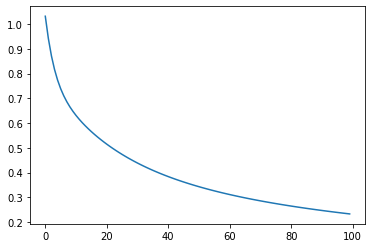

In [9]:
plt.plot(losses)

In [10]:
with torch.no_grad():
  print((perceptron(X, W, b) > 0.5).int())

tensor([[0],
        [0],
        [0],
        [1]], dtype=torch.int32)


## OR Gate

In [11]:
or_data = np.array([[0,0,0],
                     [0,1,1],
                     [1,0,1],
                     [1,1,1]])

# Creating a PyTorch tensor
or_data = torch.Tensor(or_data)

In [12]:
# Same slicing as np arrays
X = or_data[:,:-1]
y = or_data[:,-1:]

In [13]:
W = torch.randn((1,2), requires_grad=True)
b = torch.randn((1,1), requires_grad=True)

**Reuse the training loop**

In [14]:
n_epochs = 100
lr = 5e-1
losses = []
for _ in range(n_epochs):
  # Define the Training Loop here
  # 
  # Get predictions
  # Calculate Loss
  # Do a backward step (to calculate gradients)
  # Update Weights
  # Append Loss
  pred = perceptron(X, W, b)
  loss = binary_cross_entropy(pred, y)
  losses.append(loss.item())
  loss.backward()
  
  with torch.no_grad():
    W = W.subtract(lr*W.grad)
    b = b.subtract(lr*b.grad)
  
  W.requires_grad = True
  b.requires_grad = True

W,b

(tensor([[2.5857, 2.9174]], requires_grad=True),
 tensor([[-0.7324]], requires_grad=True))

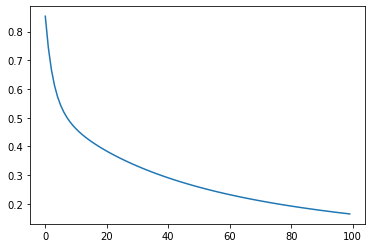

In [15]:
plt.plot(losses)

In [16]:
with torch.no_grad():
  print((perceptron(X, W, b) > 0.5).int())

tensor([[0],
        [1],
        [1],
        [1]], dtype=torch.int32)


## XOR Gate

In [17]:
xor_data = np.array([[0,0,0],
                     [0,1,1],
                     [1,0,1],
                     [1,1,0]])

# Creating a PyTorch tensor
xor_data = torch.Tensor(xor_data)

In [18]:
# Same slicing as np arrays
X = xor_data[:,:-1]
y = xor_data[:,-1:]

In [19]:
W = torch.randn((1,2), requires_grad=True)
b = torch.randn((1,1), requires_grad=True)

**Reuse the training loop**

In [20]:
n_epochs = 100
lr = 5e-1
losses = []
for _ in range(n_epochs):
  # Define the Training Loop here
  # 
  # Get predictions
  # Calculate Loss
  # Do a backward step (to calculate gradients)
  # Update Weights
  # Append Loss
  pred = perceptron(X, W, b)
  loss = binary_cross_entropy(pred, y)
  losses.append(loss.item())
  loss.backward()
  
  with torch.no_grad():
    W = W.subtract(lr*W.grad)
    b = b.subtract(lr*b.grad)
  
  W.requires_grad = True
  b.requires_grad = True

W,b

(tensor([[0.0101, 0.1068]], requires_grad=True),
 tensor([[-0.0694]], requires_grad=True))

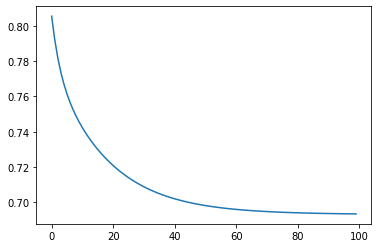

In [21]:
plt.plot(losses)

In [22]:
# Even though the loss function converges, the results are wrong because XOR is not linearly seperable
with torch.no_grad():
  print((perceptron(X, W, b) > 0.5).int())

tensor([[0],
        [1],
        [0],
        [1]], dtype=torch.int32)


## Need for MLP

As seen above, we are unable to model the XOR gate using a single layer perceptron, so we need to add a hidden layer.

In [23]:
W1 = torch.randn((10,2), requires_grad=True)
W2 = torch.randn((1,10), requires_grad=True)
b1 = torch.randn((1,10), requires_grad=True)
b2 = torch.randn((1,1), requires_grad=True)

**Implement the `mlp` function** *(1 point)*

In [24]:
def mlp(inputs, W1, W2, b1, b2):
  '''
    Defines the multi-layer perceptron model

    Note: Only 1 hidden layer
  '''
  l1_out = sigmoid(torch.matmul(inputs, W1.T) + b1)   # Perform linear combination on input layer, followed by activation function and pass the result to the second layer
  l2_out = sigmoid(torch.matmul(l1_out, W2.T) + b2)
  return l2_out

**Reuse the training loop**

NOTE: It will require slight modification due to the hidden layer

In [25]:
n_epochs = 1000
lr = 5e-1
losses = []
for _ in range(n_epochs):
  # Define the Training Loop here
  # 
  # Get predictions
  # Calculate Loss
  # Do a backward step (to calculate gradients)
  # Update Weights
  # Append Loss
  pred = mlp(X, W1, W2, b1, b2)
  loss = binary_cross_entropy(pred, y)
  losses.append(loss.item())
  loss.backward()
  
  with torch.no_grad():             # Update the weights and biases of both layers
    W2 = W2.subtract(lr*W2.grad)
    b2 = b2.subtract(lr*b2.grad)
    W1 = W1.subtract(lr*W1.grad)
    b1 = b1.subtract(lr*b1.grad)
  
  W2.requires_grad = True
  b2.requires_grad = True
  W1.requires_grad = True
  b1.requires_grad = True


W1,W2,b1,b2

(tensor([[ 4.7904, -3.5268],
         [ 0.8887, -1.4294],
         [-3.8022, -4.5976],
         [ 0.7859, -0.5554],
         [-2.8257,  1.2470],
         [ 1.5147,  0.2531],
         [ 2.5219, -1.0451],
         [ 4.8832, -5.6945],
         [ 2.6242, -3.4807],
         [-0.7692, -0.9287]], requires_grad=True),
 tensor([[-5.5917,  1.1680, -5.0610, -0.2323,  3.0780, -1.0881, -1.8628,  7.2356,
           3.0266, -0.9186]], requires_grad=True),
 tensor([[ 1.5154, -1.1843,  1.1877,  0.1159, -0.1618, -1.2904,  0.0525, -2.5633,
          -1.5478, -1.9227]], requires_grad=True),
 tensor([[2.9189]], requires_grad=True))

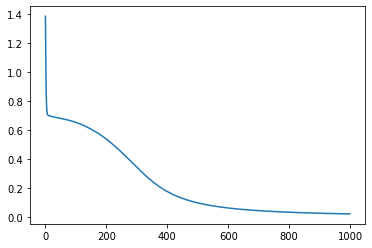

In [26]:
plt.plot(losses)

In [27]:
with torch.no_grad():
  print((mlp(X, W1, W2, b1, b2) > 0.5).int())

tensor([[0],
        [1],
        [1],
        [0]], dtype=torch.int32)
